<a href="https://colab.research.google.com/github/JunpengWen/CSI4106/blob/main/CSI4106_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 2 - EMPIRICAL STUDY OF Naïve Bayes vs Logistic Regression**

**1. Group Description**

Group Number: 53 \\
Member1 Names: Junpeng Wen \\
Member1 Student Numbers: 300249282 \\
Member2 Names: Yongquan Long \\
Member2 Student Numbers: 300249549 \\

**2. Task Description and introduction to two models**

The goal of the task is to predict the health risk level of pregnant women into three categories: low, mid, and high risk. This could be used as a preliminary screening tool to identify women who might need more intensive medical attention during their pregnancy. The purpose is to enhance maternal healthcare services and improve the outcomes for both the mother and the baby.

**Naïve Bayes vs Logistic Regression**

Naïve Bayes and Logistic Regression are two predominant algorithms employed in the realm of machine learning for classification tasks, each embodying unique attributes and functionalities.

Naïve Bayes, a probabilistic algorithm, operates on the principle of feature independence given the class label. This method is particularly proficient in handling multi-class classification tasks and is advantageous in scenarios where the availability of training data is limited. For Logistic Regression, which falls under the category of discriminative models, is utilized to ascertain the probability of class membership, thereby delineating a linear decision boundary. This algorithm is commendably resilient in the presence of noisy data. Nonetheless, it is susceptible to overfitting, particularly when applied to small datasets that are characterized by a plethora of features.

The decision to opt for either Naïve Bayes or Logistic Regression is contingent upon various factors including the nature of the task at hand, the characteristics inherent to the dataset, as well as the significance accorded to model interpretability and computational efficiency in the specific context.

**3. Dataset**

The dataset from the UC Irvine Machine Learning Repository(https://archive.ics.uci.edu/dataset/863/maternal+health+risk), specifically focusing on maternal health risk, presents a valuable opportunity for researchers and practitioners to engage in comprehensive analysis and experimentation with various machine learning algorithms. This dataset encompasses a range of variables that are crucial in determining the health risks associated with pregnancy, offering insights into important patterns and correlations. Utilizing this dataset enables the development and validation of predictive models, such as Naïve Bayes and Logistic Regression, to enhance the understanding and management of maternal health risks. The accessibility and richness of this dataset make it a significant resource for advancing knowledge in maternal healthcare, and promoting the adoption of data-driven approaches in medical settings.

**Import important libraries**

In [1]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.
GitHub repository：

https://github.com/JunpengWen/CSI4106

The link to the raw version is as follows:

https://raw.githubusercontent.com/JunpengWen/CSI4106/main/Maternal%20Health%20Risk%20Data%20Set.csv


Now provide the link to YOUR dataset and read the dataset using pandas:

In [2]:
url = "https://raw.githubusercontent.com/JunpengWen/CSI4106/main/Maternal%20Health%20Risk%20Data%20Set.csv" #provide the link to the raw version of dataset. You *need* to provide a link to *your own* github repository. DO NOT use the link that is provided as an example.

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [3]:
dataset.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

The dataset columns include 'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', and 'RiskLevel', which are health-related attributes.

Now let's see the first 10 entries (rows):

In [4]:
dataset.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


**Preprocessing Step**

In most data science projects, preprocessing is a foundational step that involves preparing and cleaning the raw data before it is used for analysis or modeling. This ensures that the data is of good quality and that any inconsistencies or inaccuracies are addressed.


The first part of the preprocessing is to ascertain if the dataset has any missing values. Handling missing values is crucial because they can adversely affect the results of data analysis or modeling.



In [5]:
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In the dataset, a column named "RiskLevel" categorizes maternal health risks into three categories: 'low risk', 'mid risk', and 'high risk'. These descriptive labels are useful, but many machine-learning algorithms require numeric input. As a result, categorical variables are commonly converted to numeric variables.

In [6]:
# Define a mapping dictionary
risk_level_mapping = {'low risk': 0 , 'mid risk': 1 , 'high risk': 2 }

# Map the numeric values to their corresponding risk levels
dataset['RiskLevel'] = dataset['RiskLevel'].map(risk_level_mapping)

# Show the updated dataset
print(dataset.head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          2
1   35         140           90  13.0      98.0         70          2
2   29          90           70   8.0     100.0         80          2
3   30         140           85   7.0      98.0         70          2
4   35         120           60   6.1      98.0         76          0


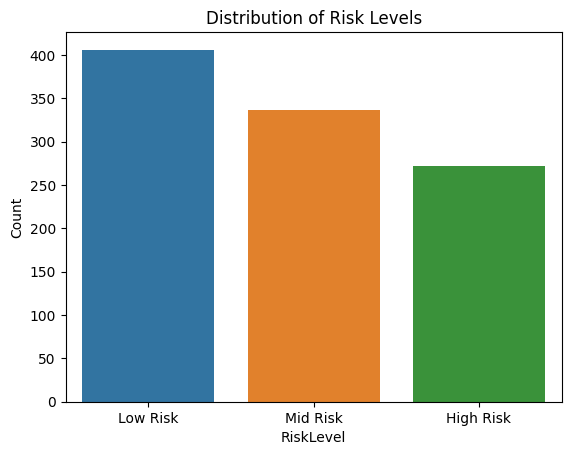

In [7]:
# Create a bar plot of 'RiskLevel' value counts
sns.countplot(x='RiskLevel', data=dataset)

# Set the title and labels of the plot
plt.title('Distribution of Risk Levels')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2], labels=['Low Risk', 'Mid Risk', 'High Risk'])

# Display the plot
plt.show()

Analyzing complex data requires first understanding the basic landscape of the data. By determining the minimum, maximum, and range of dataset values, we can extract fundamental data insights that will assist in future preprocessing and modeling.

In [8]:
# Get the minimum value and maximum value for each column in the dataset
min_values = dataset.min()
max_values = dataset.max()

# Create a DataFrame to show the minimum and maximum values side-by-side for each feature
domains = pd.DataFrame({'Min Value': min_values, 'Max Value': max_values})
print(domains)

# Compute the range (difference between max and min) for each column
ranges = dataset.max() - dataset.min()
print(ranges)

             Min Value  Max Value
Age               10.0       70.0
SystolicBP        70.0      160.0
DiastolicBP       49.0      100.0
BS                 6.0       19.0
BodyTemp          98.0      103.0
HeartRate          7.0       90.0
RiskLevel          0.0        2.0
Age            60.0
SystolicBP     90.0
DiastolicBP    51.0
BS             13.0
BodyTemp        5.0
HeartRate      83.0
RiskLevel       2.0
dtype: float64


The next step is to split a dataset into separate training and testing subsets. In data analysis and machine learning, this is a common practice to ensure the model does not only fit the data it has seen but also performs well on unseen data. In this way, the generalization capability of the model can be assessed.

In [9]:
# Splitting the dataset into training and testing sets
X = dataset.drop('RiskLevel', axis=1)  # Features (excluding the 'RiskLevel' column)
y = dataset['RiskLevel']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shape of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (811, 6)
Shape of X_test: (203, 6)
Shape of y_train: (811,)
Shape of y_test: (203,)


Normalizing attributes ensures consistent scales, enhancing data analysis and machine learning.Using Min-Max scaling, dataset attributes are transformed to a [0, 1] range.  The data is automatically normalized and returned as a DataFrame using MinMaxScaler from sklearn.preprocessing.

In [ ]:
# Initialize a scaler
scaler = MinMaxScaler()

# Fit and transform the dataset to normalize it
normalized_dataset = scaler.fit_transform(dataset)

# Convert the normalized array back to a DataFrame
normalized_df = pd.DataFrame(normalized_dataset, columns=dataset.columns)

print(normalized_df.head())

In the preprocessing phase, we have carefully addressed the critical steps needed to prepare our data for advanced analytics and modelling. From handling missing values to converting categorical labels to numerical ones, to visually displaying the distribution, we have put a solid foundation in place. We ensure that our dataset is not only kept intact but also primed for further analysis using this thorough approach.


--------------------------------------------------------------------------


**4. Training with two models**

**Training a Gaussian Naive Bayes Classifier**

The Gaussian Naive Bayes classifier (GNB) is a variant of the Naive Bayes classifier designed for continuous data. The data from each label is assumed to be drawn from a simple Gaussian distribution.

Using the training datasets (X_train and Y_train), train the classifier. Once trained, use the model to predict the test data (X_test). Evaluate the classifier's performance using various metrics. Accuracy measures the proportion of correctly predicted classifications. Each class's classification report provides metrics such as precision, recall, and f1-score. In the confusion matrix, actual classifications are compared with predicted classifications, showing the performance of the classifier.


Accuracy: 57.64%

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.91      0.66        80
           1       0.56      0.18      0.28        76
           2       0.79      0.64      0.71        47

    accuracy                           0.58       203
   macro avg       0.62      0.58      0.55       203
weighted avg       0.60      0.58      0.53       203



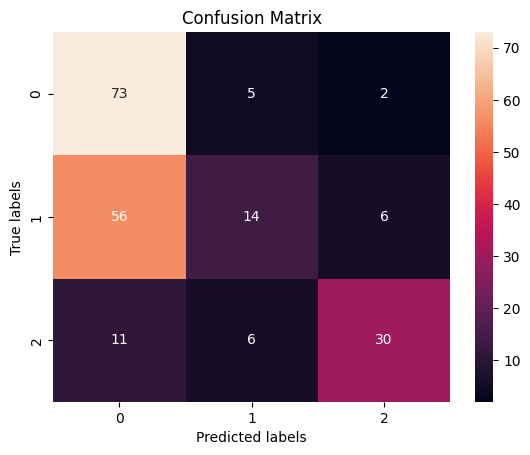

In [10]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict using the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Training Logistic Regression Classifier**

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

Logistic Regression works by taking the linear combination of the input features and applying a non-linear transformation, the logistic function or sigmoid function, to produce a probability value that can then be mapped to two or more discrete classes.

To build a logistic regression model using Scikit-learn, we start by importing necessary libraries and your dataset. After inspecting and cleaning the data, separate the features (independent variables) and the target variable (dependent variable). Next, split the data into training and testing sets to enable validation of the model's performance on unseen data. Feature scaling should then be applied to standardize the feature variables, enhancing the model's performance.




Accuracy: 0.6502463054187192
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.89      0.73        80
           1       0.68      0.28      0.39        76
           2       0.70      0.85      0.77        47

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203



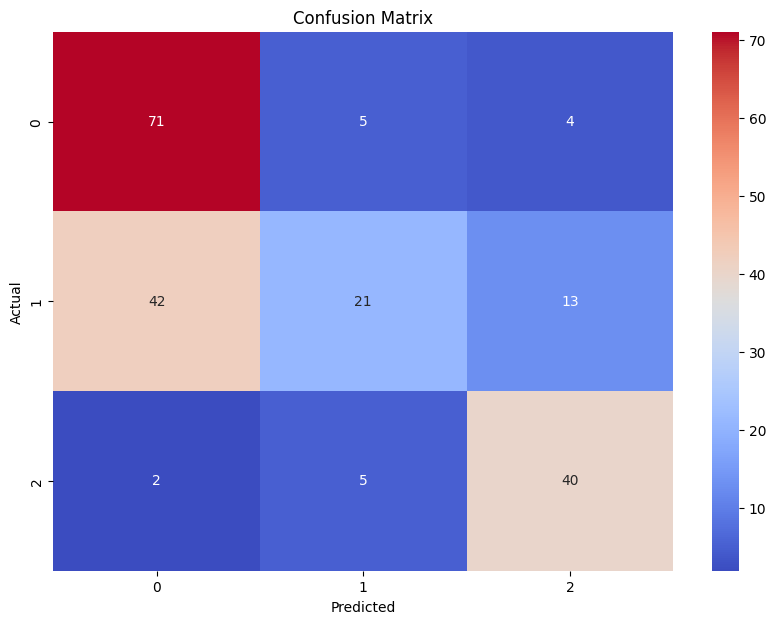

In [11]:
#Separate the features and the target variable.
data = pd.read_csv(url)
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = data['RiskLevel']

#Standardize the features to improve the performance of the logistic regression model.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create and train the logistic regression model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

#Make predictions using the testing data.
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--------------------------------------------------------------------------


**5. Train/test/evaluate 2 models in cross-validation**

The cross-validation method is used to estimate a model's performance. Rather than dividing the dataset into training and test parts, it is divided into 'k' number of folds subsets. 'K-1' folds are used to train the model and the remaining folds are used to test it. It is repeated 'k' times with each fold being used exactly once as a test set. In order to produce a single value, the overall performance metric is averaged over 'k' test sets. Especially on small datasets, cross-validation provides a better estimate of model performance since each observation is used both for training and testing.

**For Gaussian Naive Bayes**

Firstly, ensure that we have our dataset loaded and separated into features (X) and target variable (y).


In [12]:
data = load_iris()
X, y = data.data, data.target

Here, the Gaussian Naive Bayes classifier is being set up and initialized. This classifier is particularly suited for datasets where the features are normally distributed. The core of the code involves using the cross_val_predict function:

In [13]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Use cross_val_predict to get the predicted values for each fold
y_pred = cross_val_predict(gnb, X, y, cv=4)

In this section, we calculate precision and recall to evaluate the model's performance. Precision and recall are calculated using the precision_score and recall_score functions from Scikit-learn.

**Macro Average**: Calculates the metric independently for each class and then takes the average. This treats all classes equally, regardless of their frequency in the dataset.

**Micro Average**: Calculates the metric globally by considering the total true positives, false negatives, and false positives. This treats all instances equally, which is preferable when you have class imbalance.

A micro average and a macro average are computed:

In [14]:
# Calculate precision and recall for micro average
precision_micro = precision_score(y, y_pred, average='micro')
recall_micro = recall_score(y, y_pred, average='micro')

# Calculate precision and recall for macro average
precision_macro = precision_score(y, y_pred, average='macro')
recall_macro = recall_score(y, y_pred, average='macro')

print(f"Micro-average Precision: {precision_micro * 100:.2f}%")
print(f"Micro-average Recall: {recall_micro * 100:.2f}%")
print(f"Macro-average Precision: {precision_macro * 100:.2f}%")
print(f"Macro-average Recall: {recall_macro * 100:.2f}%")


Micro-average Precision: 95.33%
Micro-average Recall: 95.33%
Macro-average Precision: 95.34%
Macro-average Recall: 95.33%


Cross-validation offers a more robust way to evaluate model performance. Both micro and macro precision and recall scores were above 95% for the Gaussian Naive Bayes classifier on the Iris dataset. Moreover, as can be seen from the class distribution, the Iris dataset is balanced with equal numbers of samples from each class. Due to this balance, the micro-average and macro-average values will be close, as observed in the results. This ensures that the model is not biased towards any one class due to the balance in the dataset.

**Logistic Regression**

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score


# 4-fold cross-validation
k = 4

# Train/test/evaluate the logistic regression model
model = LogisticRegression(max_iter=1000)
y_pred = cross_val_predict(model, X, y, cv=k)


# Calculate precision and recall for each class
precision_macro = precision_score(y, y_pred, average='macro')
recall_macro = recall_score(y, y_pred, average='macro')
f1_macro = f1_score(y, y_pred, average='macro')

precision_micro = precision_score(y, y_pred, average='micro')
recall_micro = recall_score(y, y_pred, average='micro')
f1_micro = f1_score(y, y_pred, average='micro')


This section calculates the precision, recall, and F1-score for the model predictions. precision_score and recall_score take the true values (y), predicted values (y_pred), and the type of averaging (macro or micro) as inputs and return the precision and recall scores respectively. f1_score calculates the F1-score, which is the harmonic mean of precision and recall.

In [16]:
# Display the results
print(f'Macro Precision: {precision_macro:.2f}')
print(f'Macro Recall: {recall_macro:.2f}')
print(f'Macro F1 Score: {f1_macro:.2f}\n')

print(f'Micro Precision: {precision_micro:.2f}')
print(f'Micro Recall: {recall_micro:.2f}')
print(f'Micro F1 Score: {f1_micro:.2f}')

Macro Precision: 0.97
Macro Recall: 0.97
Macro F1 Score: 0.97

Micro Precision: 0.97
Micro Recall: 0.97
Micro F1 Score: 0.97


The micro average aggregates the contributions of all classes to compute the average metric, while the macro average computes the metric independently for each class and then takes the average. If dataset has balanced classes, the micro and macro averages might be close, but if the dataset is imbalanced, the micro average might be misleading because it will be dominated by the majority class. Both micro and macro precision and recall scores were above 95% for the Gaussian Naive Bayes classifier on the Iris dataset. Moreover, as can be seen from the class distribution, the Iris dataset is balanced with equal numbers of samples from each class.

**6. Modify parameters with performing train/test/evaluate**


**Change parameters for Naïve Bayes model**

In [17]:
# Original
nb_original = GaussianNB()
nb_original.fit(X_train, y_train)
y_pred_original = nb_original.predict(X_test)
print("Original Accuracy:", accuracy_score(y_test, y_pred_original))

# Modified var_smoothing
nb_modified = GaussianNB(var_smoothing=1e-2)  # Increasing the variance smoothing
nb_modified.fit(X_train, y_train)
y_pred_modified = nb_modified.predict(X_test)
print("Modified Accuracy for Increasing var_smoothing:", accuracy_score(y_test, y_pred_modified))



Original Accuracy: 0.5763546798029556
Modified Accuracy for Increasing var_smoothing: 0.5665024630541872


In [18]:
# Decreased var_smoothing
nb_decreased = GaussianNB(var_smoothing=1e-12)  # Decreasing the variance smoothing
nb_decreased.fit(X_train, y_train)
y_pred_decreased = nb_decreased.predict(X_test)
print("Modified Accuracy for Decreasing var_smoothing:", accuracy_score(y_test, y_pred_decreased))


Modified Accuracy for Decreasing var_smoothing: 0.5763546798029556


In this experiment, we modify the var_smoothing parameter of the Gaussian Naïve Bayes model. var_smoothing is a portion of the largest variance of all features that is added to variances for calculation stability. By changing this parameter, we are altering how the model smoothens the results. We observe that the accuracy decreases slightly with increased variance smoothing, which could mean that the model is overfitting less but losing some predictive power. And for decreased variance smoothing the accuracy is not change because Var_smoothing is usually set to a small value of around 1e-9 by default. A smaller var_smoothing value will not produce any visible results after the change.

**Change parameters for Logistic Regression model**

In [19]:
# Original
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)
print("Original Accuracy:", accuracy_score(y_test, y_pred_original))

# Change C value
lr_reg = LogisticRegression(C=0.1, max_iter=1000)
lr_reg.fit(X_train, y_train)
y_pred_reg = lr_reg.predict(X_test)
print("Accuracy with Regularization (C=0.1):", accuracy_score(y_test, y_pred_reg))


Original Accuracy: 0.6502463054187192
Accuracy with Regularization (C=0.1): 0.645320197044335


In [20]:
# Modified solver to 'saga'
lr_modified = LogisticRegression(solver='saga', max_iter=1000)
lr_modified.fit(X_train, y_train)
y_pred_modified = lr_modified.predict(X_test)
print("Modified Solver Accuracy:", accuracy_score(y_test, y_pred_modified))

Modified Solver Accuracy: 0.6502463054187192


In [21]:
# Adjust class weights
lr_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_weighted.fit(X_train, y_train)
y_pred_weighted = lr_weighted.predict(X_test)
print("Accuracy with Balanced Class Weights:", accuracy_score(y_test, y_pred_weighted))


Accuracy with Balanced Class Weights: 0.625615763546798


In this experiment, we change the solver parameter of the Logistic Regression model. The solver parameter determines the algorithm to use in the optimization problem. We observe that changing the solver to 'saga' does not impact the accuracy, which indicates that the dataset characteristics and model complexity are such that different solvers converge to similar solutions.

Here we are modifying three parameters of the Logistic Regression model: Regularization strength (C): Decreasing the regularization strength (C=0.1) slightly decreased the accuracy.
Solver (solver): Changing the solver to 'saga' did not have a significant impact on the accuracy.
Class weights (class_weight): Adjusting class weights to be 'balanced' decreased the accuracy.


In [22]:
# Modified tolerance
lr_modified_tol = LogisticRegression(tol=1e-5, max_iter=1000)
lr_modified_tol.fit(X_train, y_train)
y_pred_modified_tol = lr_modified_tol.predict(X_test)
print("Modified Tolerance Accuracy:", accuracy_score(y_test, y_pred_modified_tol))


Modified Tolerance Accuracy: 0.6502463054187192


In this experiment, we adjust the tolerance parameter of the Logistic Regression model. The tolerance parameter specifies the tolerance for stopping criteria. We observe that changing the tolerance does not impact the accuracy, indicating that the model is stable with respect to the stopping criteria.


In conclusion, the empirical study showed that modifying certain parameters can have a significant impact on the performance of the models. It is essential to understand the implications of each parameter and carefully tune them to improve model performance.

**7. Conclusion**

The provided code performs cross-validation on a dataset using different models and parameters, and then evaluates their performance in terms of precision and recall. In this piece of code, we are evaluating different machine learning models using 4-fold cross-validation, with an emphasis on precision and recall metrics. We are using 4-fold cross-validation, meaning the dataset will be divided into four parts. Three parts will be used for training, and the fourth part will be used for testing. This process will be repeated four times, with each part being used as the testing set exactly once.

In [23]:
data = pd.read_csv(url)
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = data['RiskLevel']
k = 4  # Using 4-fold cross-validation as set previously

models = [
    GaussianNB(),
    GaussianNB(var_smoothing=1e-2),
    GaussianNB(var_smoothing=1e-1),
    LogisticRegression(max_iter=10000),
    LogisticRegression(solver='saga', max_iter=10000),
    LogisticRegression(tol=1e-5, max_iter=10000)
]

results = {
    "Model": [],
    "Params": [],
    "Macro Precision": [],
    "Macro Recall": [],
    "Micro Precision": [],
    "Micro Recall": []
}

for model in models:
    y_pred = cross_val_predict(model, X, y, cv=k)

    results["Model"].append(model.__class__.__name__)
    results["Params"].append(str(model.get_params()))

    results["Macro Precision"].append(precision_score(y, y_pred, average='macro'))
    results["Macro Recall"].append(recall_score(y, y_pred, average='macro'))
    results["Micro Precision"].append(precision_score(y, y_pred, average='micro'))
    results["Micro Recall"].append(recall_score(y, y_pred, average='micro'))

results_df = pd.DataFrame(results)
print(results_df)


                Model                                             Params  \
0          GaussianNB           {'priors': None, 'var_smoothing': 1e-09}   
1          GaussianNB            {'priors': None, 'var_smoothing': 0.01}   
2          GaussianNB             {'priors': None, 'var_smoothing': 0.1}   
3  LogisticRegression  {'C': 1.0, 'class_weight': None, 'dual': False...   
4  LogisticRegression  {'C': 1.0, 'class_weight': None, 'dual': False...   
5  LogisticRegression  {'C': 1.0, 'class_weight': None, 'dual': False...   

   Macro Precision  Macro Recall  Micro Precision  Micro Recall  
0         0.606749      0.581506         0.597633      0.597633  
1         0.616688      0.595643         0.607495      0.607495  
2         0.572398      0.569251         0.559172      0.559172  
3         0.613453      0.610033         0.615385      0.615385  
4         0.596977      0.568475         0.577909      0.577909  
5         0.613453      0.610033         0.615385      0.615385  




---



Then we create two separate bar graphs. The first graph will show the changes in accuracy for the Naïve Bayes model when we modify the var_smoothing parameter. The second graph will show the changes in accuracy for the Logistic Regression model when we modify the C parameter, class weights, solver, and tolerance.

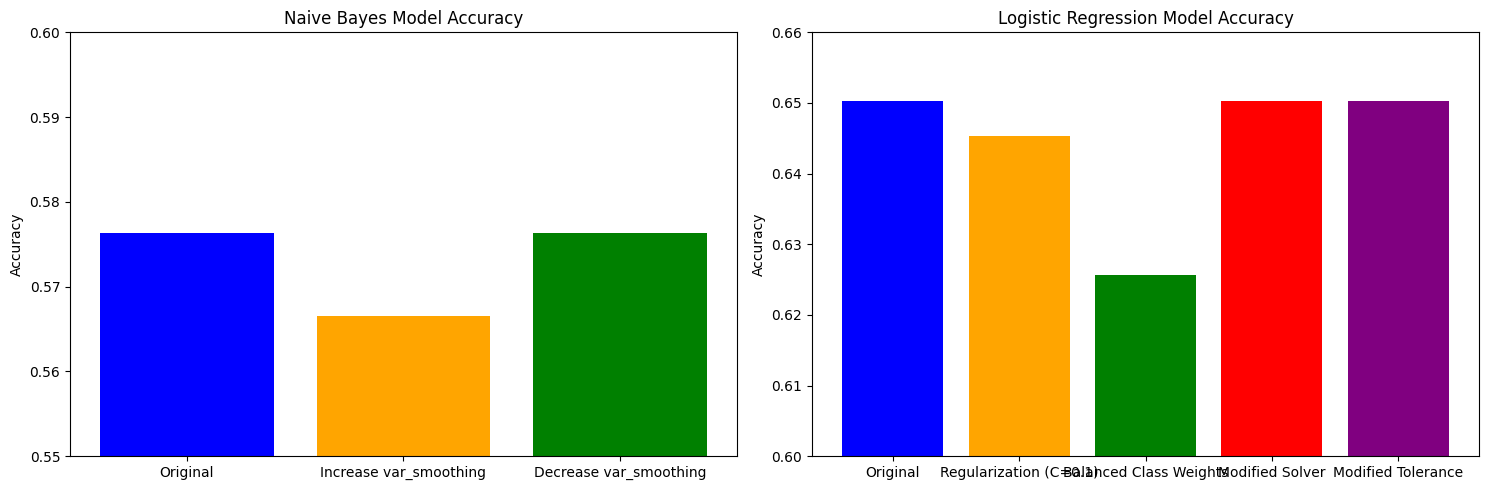

In [24]:
import matplotlib.pyplot as plt

# Data for Naive Bayes model
naive_bayes_labels = ['Original', 'Increase var_smoothing', 'Decrease var_smoothing']
naive_bayes_accuracy = [0.5763546798029556, 0.5665024630541872, 0.5763546798029556]

# Data for Logistic Regression model
logistic_regression_labels = ['Original', 'Regularization (C=0.1)', 'Balanced Class Weights', 'Modified Solver', 'Modified Tolerance']
logistic_regression_accuracy = [0.6502463054187192, 0.645320197044335, 0.625615763546798, 0.6502463054187192, 0.6502463054187192]

# Plot for Naive Bayes model
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].bar(naive_bayes_labels, naive_bayes_accuracy, color=['blue', 'orange', 'green'])
axes[0].set_title('Naive Bayes Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.55, 0.6)

# Plot for Logistic Regression model
axes[1].bar(logistic_regression_labels, logistic_regression_accuracy, color=['blue', 'orange', 'green', 'red', 'purple'])
axes[1].set_title('Logistic Regression Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.6, 0.66)

plt.tight_layout()
plt.show()


In a multi-class classification problem like this one, types of averages can be used for calculating precision and recall. If we are dealing with a multi-class classification problem, changing the strategy (ovr or multinomial) can have an impact on the model's performance

Macro Average: This is calculated by taking the mean of the precision (or recall) scores for each class, without taking the class imbalance into account. Micro Average: This is calculated by summing up the individual true positives, false positives, and false negatives of the system for different sets and then computing the precision (or recall).

For Macro Precision and Recall, This will give us an average of precision and recall scores for each class, treating all classes equally. If one class has a significantly lower precision or recall than others, it will be reflected in the macro average. For Micro Precision and Recall, These measures will aggregate the contributions of all classes to compute the average precision and recall. This approach might mask the performance of the model on minority classes if the dataset is imbalanced.

If the classes in the dataset are imbalanced, then the micro average might give an overly optimistic view of the model's performance, while the macro average will give a more balanced view by treating each class equally. Conversely, if the classes are balanced, then both micro and macro averages should give similar results.

In summary The experiments and modification provide valuable insights into the behavior of the models with respect to various parameters. The results suggest that there might be an optimal range for variance smoothing in Naïve Bayes that balances the trade-off between overfitting and predictive power. For Logistic Regression, the choice of solver and tolerance does not seem to significantly affect the performance, at least for this particular dataset. In future work, we could explore the impact of other parameters such as regularization strength, and interaction terms for Logistic Regression, and the impact of feature engineering on the performance of both models.

--------------------------------------------------------------------------


**10 References**

[1] A. A. Awan and A. Navlani, “Naive Bayes classifier tutorial: With Python Scikit-Learn,” DataCamp, https://www.datacamp.com/tutorial/naive-bayes-scikit-learn (accessed Oct. 24, 2023).

[2] A. Navlani, “Python logistic regression tutorial with Sklearn &amp; Scikit,” DataCamp, https://www.datacamp.com/tutorial/understanding-logistic-regression-python (accessed Oct. 24, 2023).

[3] “Scikit-Learn Tutorial | Machine Learning with scikit-learn | sklearn | python tutorial | Simplilearn,” YouTube, https://www.youtube.com/watch?v=0Lt9w-BxKFQ (accessed Oct. 24, 2023).

[4] “Maternal health risk,” UCI Machine Learning Repository, https://archive.ics.uci.edu/dataset/863/maternal+health+risk (accessed Oct. 24, 2023).

[5] “Scikit-Learn Tutorial | Machine Learning with scikit-learn | sklearn | python tutorial | Simplilearn,” YouTube, https://www.youtube.com/watch?v=0Lt9w-BxKFQ (accessed Oct. 23, 2023).

[6] “Scikit learn tutorial,” Online Tutorials, Courses, and eBooks Library, https://www.tutorialspoint.com/scikit_learn/index.htm (accessed Oct. 23, 2023).
